**Data Extraction**

In [ ]:
#import library 
import tweepy
import datetime
import pandas as pd
import numpy as np

In [ ]:
#twitter account's info
consumer_key = "##################"
consumer_secret = "####################################################"
access_token ="#################################################"
access_token_secret ="###############################################"

In [ ]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret )
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#declaration of the days 
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=30)

In [ ]:
tweets_list = tweepy.Cursor(api.search, lang='en', q="fast and furious 9 since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended').items()

In [ ]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    output.append(line)

I’m watching Fast 9. And a car got hit on the left tail end and flipped into the air……….. Ayo defund the fast and furious franchise please
Fast and Furious 9 is one of the most ridiculous films I've ever seen 😂
RT @da13thsun: Th Soul may desire to test drive a Better Body like Ye love a new benz AMG...

This is NOT Your Assigned Vessel and must ret…
RT @da13thsun: Th Soul may desire to test drive a Better Body like Ye love a new benz AMG...

This is NOT Your Assigned Vessel and must ret…
Fast and Furious 9 is releasing from Today at @gvstudiocitytnj. Ticket Booking is going on at Theater Counter and Online at https://t.co/LCTYIZWFYQ
Screen : Shanthi 4K AC DTS, Shivaji 4K AC DTS
Language : Tamil 2D
#FastAndFurious9
#Theatersareback https://t.co/vJxgK5RksG
RT @da13thsun: Th Soul may desire to test drive a Better Body like Ye love a new benz AMG...

This is NOT Your Assigned Vessel and must ret…
RT @da13thsun: Th Soul may desire to test drive a Better Body like Ye love a new benz AMG...



In [ ]:
import pandas as pd
df = pd.DataFrame(output)
df.to_csv('fast and furious 9.csv')

***Data cleaning ***

In [1]:
# Import all required libraries

import nltk
import numpy as np
import re
import pandas as pd 
import pylab as pl
import matplotlib.pyplot as plt

from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot

#plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

!pip install datashader
import datashader as ds
import datashader.transfer_functions as tf

     |████████████████████████████████| 125 kB 5.2 MB/s 
     |████████████████████████████████| 15.8 MB 588 bytes/s 
     |████████████████████████████████| 76 kB 3.4 MB/s 
     |████████████████████████████████| 119 kB 56.9 MB/s 
     |████████████████████████████████| 779 kB 31.4 MB/s 
     |████████████████████████████████| 778 kB 55.7 MB/s 
     |████████████████████████████████| 776 kB 56.5 MB/s 
     |████████████████████████████████| 769 kB 55.8 MB/s 
     |████████████████████████████████| 766 kB 50.1 MB/s 
     |████████████████████████████████| 1.0 MB 60.7 MB/s 
     |████████████████████████████████| 722 kB 46.9 MB/s 
     |████████████████████████████████| 722 kB 60.6 MB/s 
     |████████████████████████████████| 715 kB 51.1 MB/s 
     |████████████████████████████████| 705 kB 55.1 MB/s 
     |████████████████████████████████| 699 kB 69.2 MB/s 
     |████████████████████████████████| 696 kB 66.3 MB/s 
     |████████████████████████████████| 684 kB 77.5 MB/s 
     |████████

In [41]:
from google.colab import files
uploaded = files.upload()

Saving fast and furious 9.csv to fast and furious 9 (1).csv


In [42]:
import io
data= pd.read_csv(io.BytesIO(uploaded['fast and furious 9.csv']))
data['len'] = data['text'].str.len()

In [43]:
data.head()

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len
0,0,Scott hasn’t watched all of the fast and furio...,1,0,12/08/2021 23:17,136
1,1,"@sunshine_3000 @WBruceTattrie @CapsOffside No,...",0,0,12/08/2021 23:15,87
2,2,"This Fast and Furious 9 hmm, even Krishna no d...",0,0,12/08/2021 22:33,66
3,3,"Top 5\nMaze Runner 1 2 3, Fast and Furious 1 2...",0,0,12/08/2021 21:57,303
4,6,Fast and furious 9 is top 3 worst films off al...,2,0,12/08/2021 21:51,52


In [44]:
# Number of unique tweets
unique_text = data.text.unique()
print(len(unique_text))

2034


In [45]:
# Number of unique users
unique_user = data['Unnamed: 0'].unique()
len(unique_user)

2412

In [46]:
data.text.count()

2412

In [47]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [48]:
data['Clean_text'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")

In [49]:
# remove special characters, numbers, punctuations
data['Clean_text'] = data['Clean_text'].str.replace("[^a-zA-Z#]", " ")

In [50]:
data['Clean_text'] = data['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [51]:
tokenized_tweet = data['Clean_text'].apply(lambda x: x.split())

In [52]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [scott, hasn, watch, fast, furiou, movi, final...
1                                 [save, fast, furiou]
2    [thi, fast, furiou, even, krishna, reach, like...
3    [maze, runner, fast, furiou, mission, imposs, ...
4                    [fast, furiou, worst, film, time]
Name: Clean_text, dtype: object

In [53]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['Clean_text'] = tokenized_tweet

In [54]:
tok = WordPunctTokenizer()
pattern1 = r'@[A-Za-z0-9_]+'
pattern2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pattern1, pattern2))
print(combined_pat)

www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                 "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                 "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                 "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                 "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
print(neg_pattern)

@[A-Za-z0-9_]+|https?://[^ ]+
re.compile("\\b(isn't|aren't|wasn't|weren't|haven't|hasn't|hadn't|won't|wouldn't|don't|doesn't|didn't|can't|couldn't|shouldn't|mightn't|mustn't)\\b")


In [55]:
def tweet_cleaner_updated(text):
     soup = BeautifulSoup(text, 'lxml')   
     souped = soup.get_text()
   
     try:
         bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
     except:
         bom_removed = souped
     stripped = re.sub(combined_pat, '', bom_removed)
     stripped = re.sub(www_pat, '', stripped)
     #lower_case = stripped.lower()
     #neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
     neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], stripped)
     letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
     # During the letters_only process two lines above, it has created unnecessay white spaces,
     # I will tokenize and join together to remove unneccessary white spaces
     words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
     return (" ".join(words)).strip()

In [56]:
data.loc[:,('text','Clean_text')]

,text,Clean_text
0,Scott hasn’t watched all of the fast and furio...,scott hasn watch fast furiou movi final last w...
1,"@sunshine_3000 @WBruceTattrie @CapsOffside No,...",save fast furiou
2,"This Fast and Furious 9 hmm, even Krishna no d...",thi fast furiou even krishna reach like thi
3,"Top 5\nMaze Runner 1 2 3, Fast and Furious 1 2...",maze runner fast furiou mission imposs avang s...
4,Fast and furious 9 is top 3 worst films off al...,fast furiou worst film time
...,...,...
2407,I haven't seen the Fast and furious 9 movie.\n...,haven seen fast furiou movi kodwa taxi ngathi ...
2408,@JohnCena @JamesGunn @SuicideSquadWB @Wipeout ...,fast furiou releas date
2409,RT @SceniusHub: Don't miss tomorrow our very f...,miss tomorrow veri first movi night here #ssot...
2410,watching fast and furious 9 🙏 pls pray for men...,watch fast furiou pray mental health gonna wit...


In [57]:
data[data.text.isnull()]

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text


In [58]:
data[data.Clean_text.isnull()]

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text


In [59]:
# Number of unique tweets
unique_clean_text = data.Clean_text.unique()
unique_full_text = data.text.unique()
print(len(unique_clean_text))
print(len(unique_full_text))
print(len(data))

1766
2034
2412


In [60]:
data.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)

In [61]:
data.reset_index(drop=True,inplace=True)

In [62]:
data['Clean_text_length'] = data['Clean_text'].apply(len)
data.head()

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text,Clean_text_length
0,0,Scott hasn’t watched all of the fast and furio...,1,0,12/08/2021 23:17,136,scott hasn watch fast furiou movi final last w...,66
1,1,"@sunshine_3000 @WBruceTattrie @CapsOffside No,...",0,0,12/08/2021 23:15,87,save fast furiou,16
2,2,"This Fast and Furious 9 hmm, even Krishna no d...",0,0,12/08/2021 22:33,66,thi fast furiou even krishna reach like thi,43
3,3,"Top 5\nMaze Runner 1 2 3, Fast and Furious 1 2...",0,0,12/08/2021 21:57,303,maze runner fast furiou mission imposs avang s...,149
4,6,Fast and furious 9 is top 3 worst films off al...,2,0,12/08/2021 21:51,52,fast furiou worst film time,27


In [63]:
data[data['Clean_text_length']==0]['Clean_text'] ## Looks like these are tweets with different languages or just hastags.
# We can simply drop these tweets
list = data[data['Clean_text_length']==0]['Clean_text'].index
list

Int64Index([], dtype='int64')

In [64]:
data.drop(index = list,inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1766 entries, 0 to 1765
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1766 non-null   int64 
 1   text               1766 non-null   object
 2   favourite_count    1766 non-null   int64 
 3   retweet_count      1766 non-null   int64 
 4   created_at         1766 non-null   object
 5   len                1766 non-null   int64 
 6   Clean_text         1766 non-null   object
 7   Clean_text_length  1766 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 124.2+ KB


In [66]:
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1766 non-null   int64 
 1   text               1766 non-null   object
 2   favourite_count    1766 non-null   int64 
 3   retweet_count      1766 non-null   int64 
 4   created_at         1766 non-null   object
 5   len                1766 non-null   int64 
 6   Clean_text         1766 non-null   object
 7   Clean_text_length  1766 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 110.5+ KB


***Data visualization***

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
print(data.shape)

(1766, 8)


In [69]:
data.head()

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text,Clean_text_length
0,0,Scott hasn’t watched all of the fast and furio...,1,0,12/08/2021 23:17,136,scott hasn watch fast furiou movi final last w...,66
1,1,"@sunshine_3000 @WBruceTattrie @CapsOffside No,...",0,0,12/08/2021 23:15,87,save fast furiou,16
2,2,"This Fast and Furious 9 hmm, even Krishna no d...",0,0,12/08/2021 22:33,66,thi fast furiou even krishna reach like thi,43
3,3,"Top 5\nMaze Runner 1 2 3, Fast and Furious 1 2...",0,0,12/08/2021 21:57,303,maze runner fast furiou mission imposs avang s...,149
4,6,Fast and furious 9 is top 3 worst films off al...,2,0,12/08/2021 21:51,52,fast furiou worst film time,27


In [70]:
data.isnull().any()

Unnamed: 0           False
text                 False
favourite_count      False
retweet_count        False
created_at           False
len                  False
Clean_text           False
Clean_text_length    False
dtype: bool

In [71]:
data['retweet_count'].unique()

array([   0, 3549,  400,   80,    1,    4,    2,   41,  515,    6,    8,
         13,  260,   25,  132,   14,    3,   12, 3585,   15,    5,   10,
         44,  248,  579,   67,   33,    9,   11,   50,  113,   37,   30,
          7, 1524,  224,   23,  423,   19,  117])

In [72]:
data['favourite_count'].unique()

array([   1,    0,    2,    6,    8,    3,    4,    5,   12,   10,    7,
         29,   28,   22,   20,   15,   94,   60,    9,   13,   11,   35,
         16,   14,   31,   18,   57, 1085,   73,   55,   21,  147,   25,
         58,   38,   54,   19])

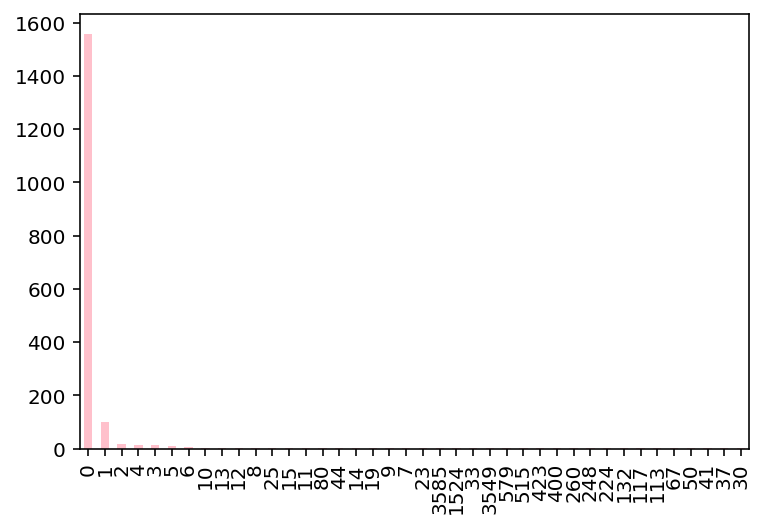

In [73]:
data['retweet_count'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

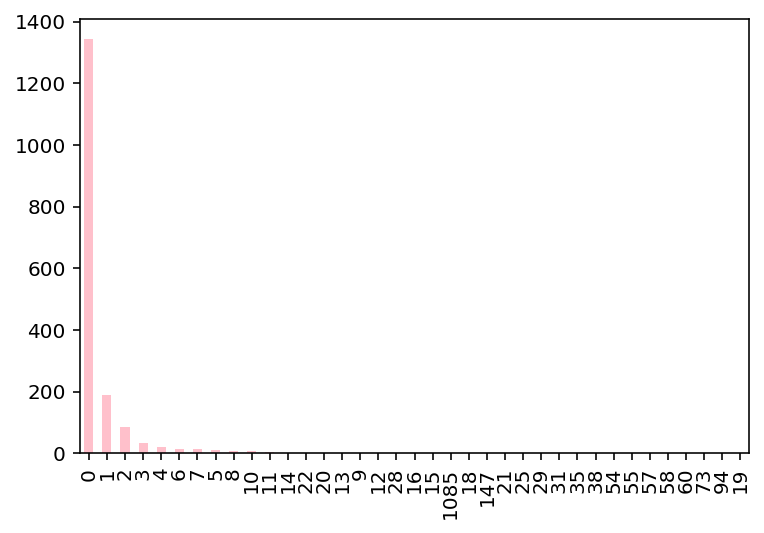

In [74]:
data['favourite_count'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [75]:
data.groupby('favourite_count').describe()

Unnamed: 0                            ... Clean_text_length               
                     count         mean          std  ...               50%     75%    max
favourite_count                                       ...                                 
0                   1343.0  1301.333582   624.589146  ...             113.0  117.00  225.0
1                    189.0  1006.576720   799.780562  ...              55.0   99.00  216.0
2                     87.0   866.413793   799.186178  ...              56.0  135.50  197.0
3                     34.0  1171.676471   823.943059  ...              48.0   74.75  186.0
4                     20.0  1329.250000   827.659469  ...              55.5   87.00  178.0
5                     12.0   959.583333   813.609964  ...              45.0   90.75  174.0
6                     14.0   851.357143   832.471077  ...              47.5  136.75  193.0
7                     13.0  1405.692308   817.093261  ...              38.0   55.00  141.0
8                      9.0   637.888889   714.521246  ...              67.0   82.00  164.0
9                      2.0  1383.500000  1214.102343  ...              84.0  112.50  141.0
10                     7.0  1198.857143   975.251152  ...              93.0  115.00  132.0
11                     4.0  1088.750000   766.556097  ...             150.0  159.25  160.0
12                     2.0   433.000000   475.175757  ...              91.5  112.75  134.0
13                     2.0  1361.000000  1149.755626  ...              43.5   48.25   53.0
14                     3.0  1763.333333   909.848522  ...              56.0   58.00   60.0
15                     1.0   346.000000          NaN  ...             145.0  145.00  145.0
16                     1.0   712.000000          NaN  ...             109.0  109.00  109.0
18                     1.0   810.000000          NaN  ...              70.0   70.00   70.0
19                     1.0  2290.000000          NaN  ...             150.0  150.00  150.0
20                     2.0   517.500000   352.846284  ...              98.0  110.50  123.0
21                     1.0  2042.000000          NaN  ...             104.0  104.00  104.0
22                     2.0   415.000000   239.002092  ...              96.5  130.75  165.0
25                     1.0  2067.000000          NaN  ...             149.0  149.00  149.0
28                     2.0   406.500000   347.189430  ...              76.0   80.00   84.0
29                     1.0   127.000000          NaN  ...             153.0  153.00  153.0
31                     1.0   808.000000          NaN  ...              86.0   86.00   86.0
35                     1.0   650.000000          NaN  ...              86.0   86.00   86.0
38                     1.0  2184.000000          NaN  ...              99.0   99.00   99.0
54                     1.0  2280.000000          NaN  ...              52.0   52.00   52.0
55                     1.0  2020.000000          NaN  ...              49.0   49.00   49.0
57                     1.0   916.000000          NaN  ...             172.0  172.00  172.0
58                     1.0  2139.000000          NaN  ...              77.0   77.00   77.0
60                     1.0   437.000000          NaN  ...             101.0  101.00  101.0
73                     1.0  1016.000000          NaN  ...              94.0   94.00   94.0
94                     1.0   421.000000          NaN  ...             134.0  134.00  134.0
147                    1.0  2065.000000          NaN  ...             115.0  115.00  115.0
1085                   1.0   938.000000          NaN  ...             163.0  163.00  163.0

[37 rows x 32 columns]

In [76]:
data.groupby('retweet_count').describe()

Unnamed: 0                            ... Clean_text_length               
                   count         mean          std  ...               50%     75%    max
retweet_count                                       ...                                 
0                 1556.0  1250.523779   657.142620  ...             113.0  117.00  225.0
1                   99.0  1138.242424   853.038556  ...              74.0  110.00  195.0
2                   19.0  1022.157895   855.037703  ...              60.0   71.50  153.0
3                   12.0  1186.333333   836.336637  ...              64.0   77.25  193.0
4                   13.0  1045.076923   917.487644  ...              71.0   84.00  153.0
5                   11.0  1502.909091   873.357711  ...              50.0   59.50   68.0
6                    6.0  1467.000000   980.218955  ...              72.5   80.00   94.0
7                    1.0  1429.000000          NaN  ...              27.0   27.00   27.0
8                    3.0   932.000000  1151.102515  ...              45.0   57.50   70.0
9                    1.0   804.000000          NaN  ...              35.0   35.00   35.0
10                   4.0   996.000000   939.965602  ...              49.0   54.75   69.0
11                   2.0  1465.500000   847.821031  ...             107.0  111.00  115.0
12                   3.0   952.000000   978.218278  ...              76.0  112.50  149.0
13                   3.0  1521.666667  1193.505900  ...              59.0   67.00   75.0
14                   2.0   320.000000   142.835570  ...             106.0  120.00  134.0
15                   3.0   644.333333   330.769305  ...              56.0  114.00  172.0
19                   1.0  2256.000000          NaN  ...              44.0   44.00   44.0
23                   1.0  2110.000000          NaN  ...              60.0   60.00   60.0
25                   3.0  1075.333333  1133.979424  ...              53.0   63.50   74.0
30                   1.0  1102.000000          NaN  ...              55.0   55.00   55.0
33                   1.0   669.000000          NaN  ...              52.0   52.00   52.0
37                   1.0  1099.000000          NaN  ...              37.0   37.00   37.0
41                   1.0   103.000000          NaN  ...              62.0   62.00   62.0
44                   2.0   648.500000   439.113311  ...              61.0   71.50   82.0
50                   1.0   999.000000          NaN  ...              27.0   27.00   27.0
67                   1.0   526.000000          NaN  ...              32.0   32.00   32.0
80                   2.0   480.500000   647.002705  ...             124.5  143.75  163.0
113                  1.0  1000.000000          NaN  ...              69.0   69.00   69.0
117                  1.0  2414.000000          NaN  ...              16.0   16.00   16.0
132                  1.0   210.000000          NaN  ...              47.0   47.00   47.0
224                  1.0  2085.000000          NaN  ...              42.0   42.00   42.0
248                  1.0   356.000000          NaN  ...              63.0   63.00   63.0
260                  1.0   205.000000          NaN  ...              57.0   57.00   57.0
400                  1.0    17.000000          NaN  ...              48.0   48.00   48.0
423                  1.0  2122.000000          NaN  ...              56.0   56.00   56.0
515                  1.0   108.000000          NaN  ...              46.0   46.00   46.0
579                  1.0   357.000000          NaN  ...              80.0   80.00   80.0
1524                 1.0  2021.000000          NaN  ...              69.0   69.00   69.0
3549                 1.0    15.000000          NaN  ...              72.0   72.00   72.0
3585                 1.0   247.000000          NaN  ...              40.0   40.00   40.0

[40 rows x 32 columns]

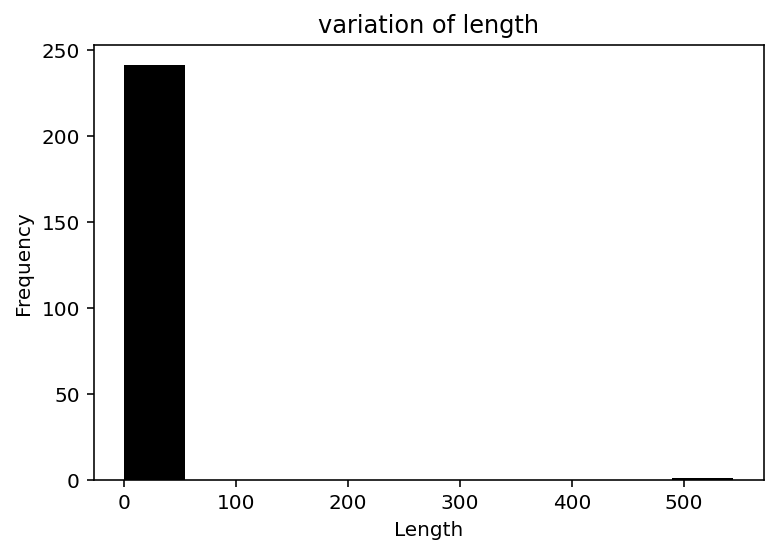

In [77]:
data.groupby('len').mean()['favourite_count'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

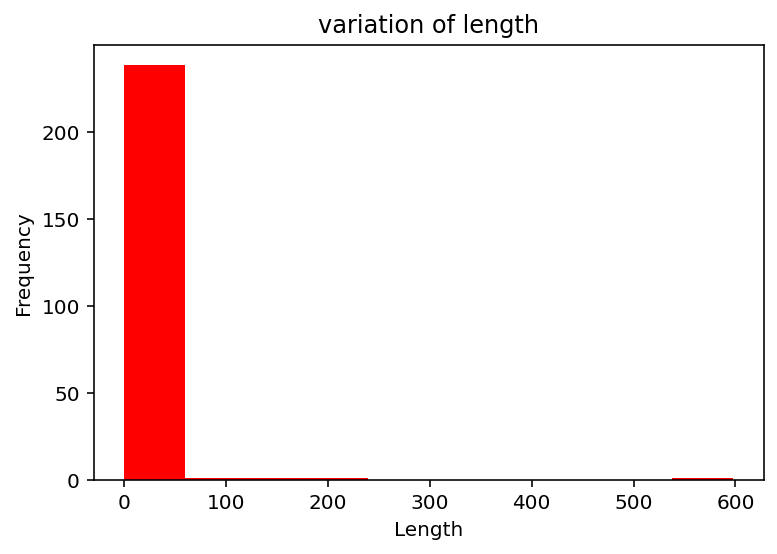

In [78]:
data.groupby('len').mean()['retweet_count'].plot.hist(color = 'red', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

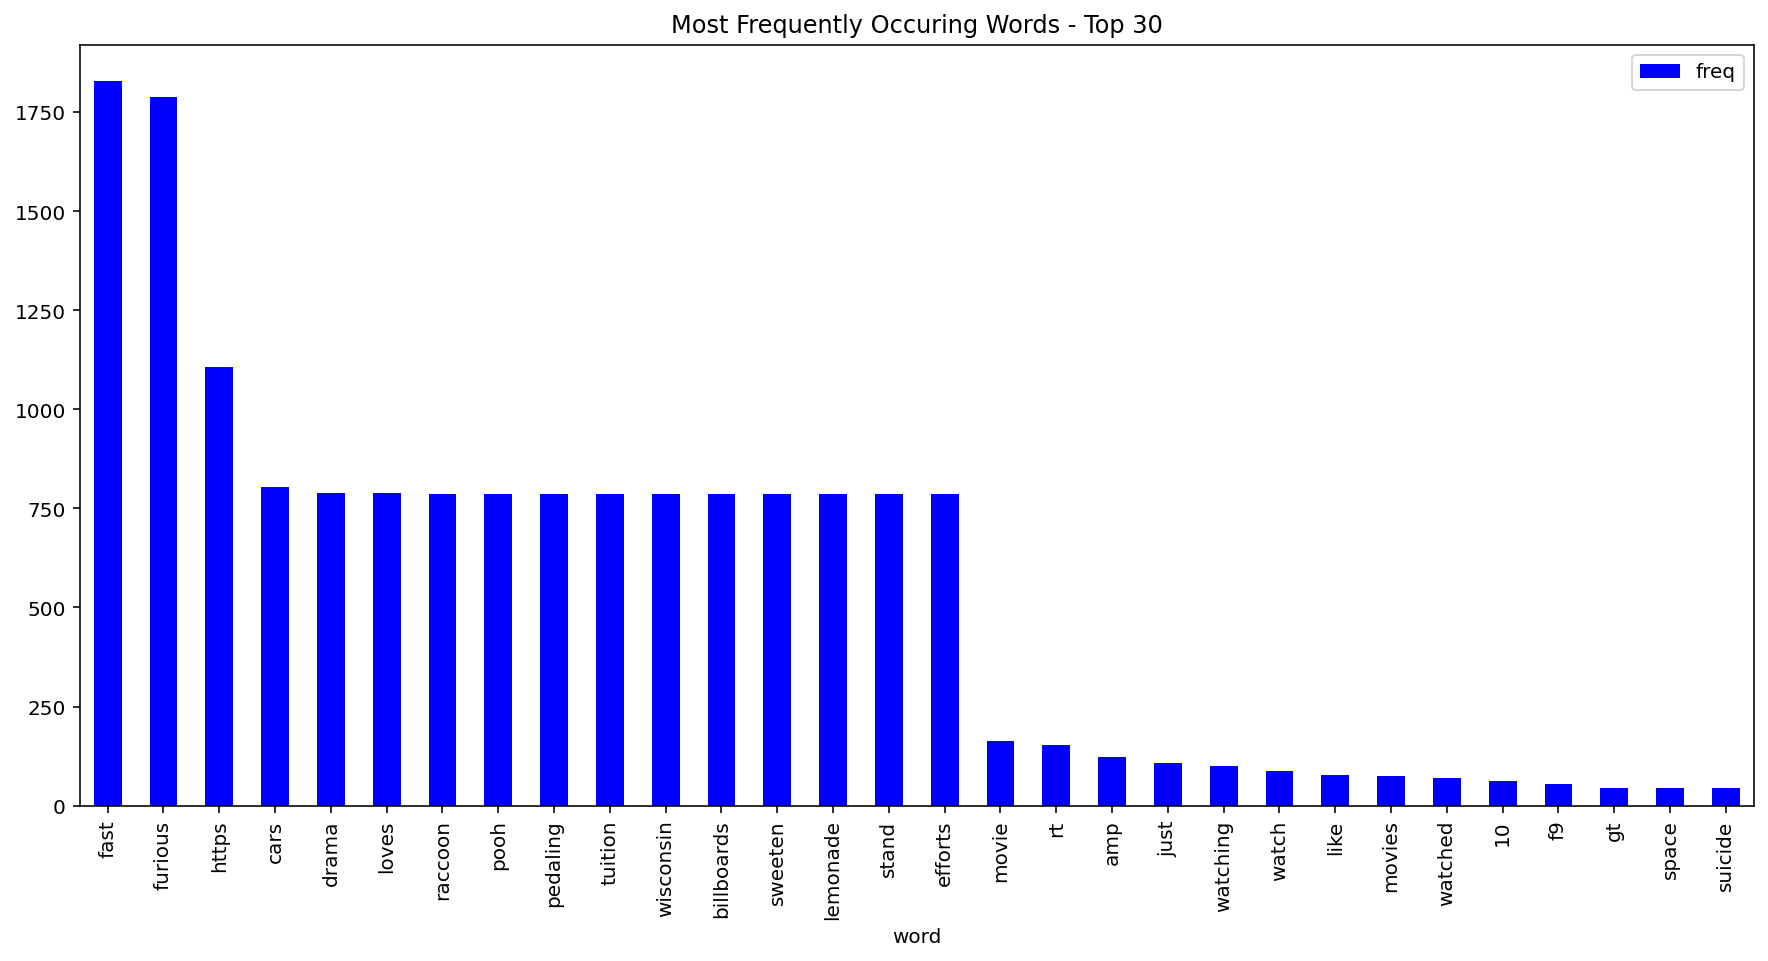

In [79]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

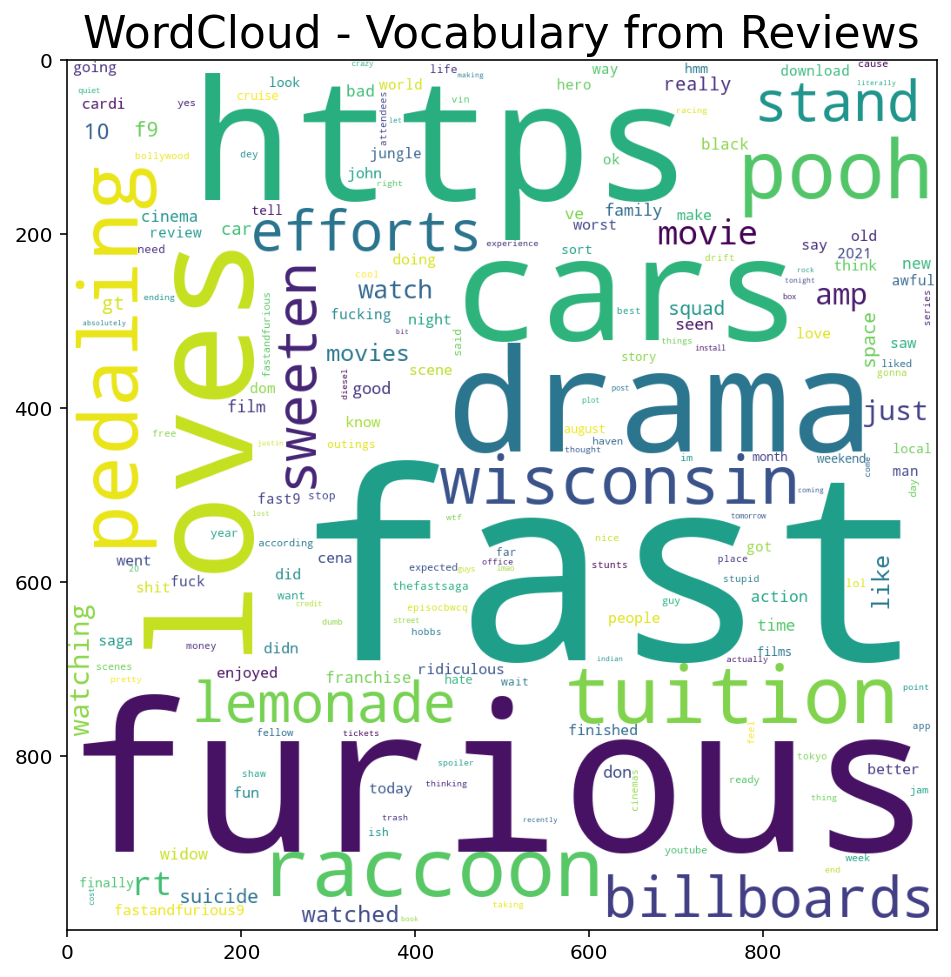

In [80]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

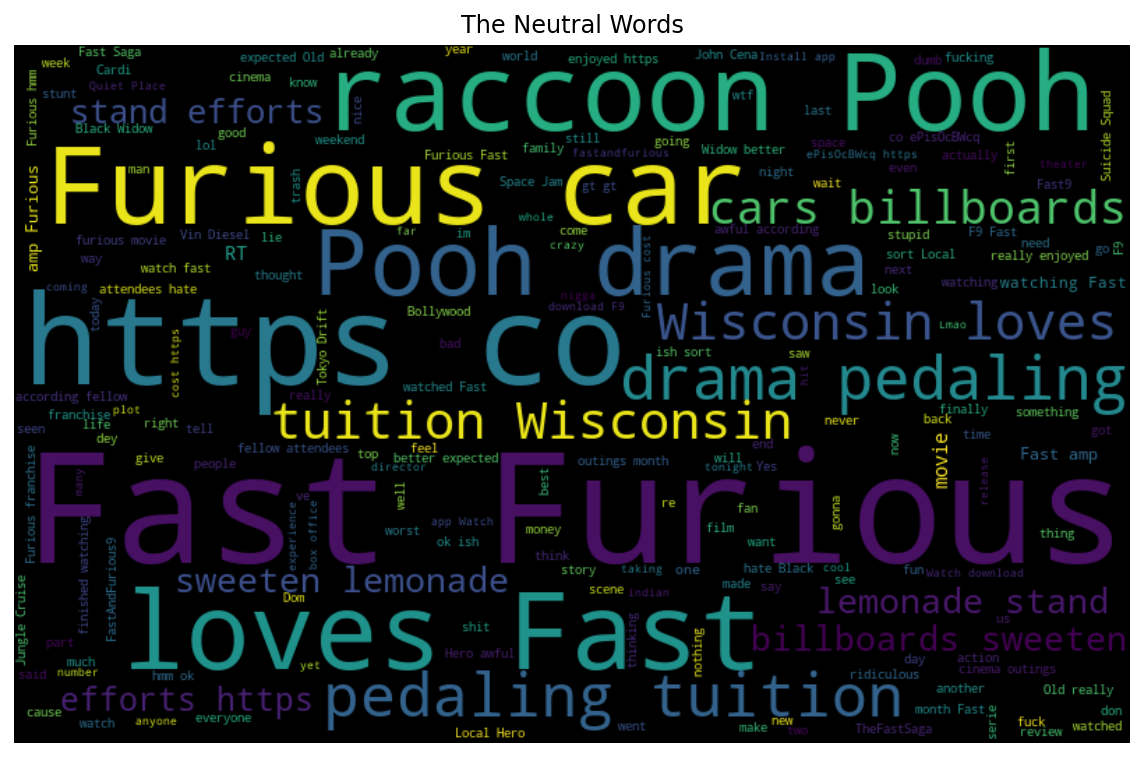

In [81]:
normal_words =' '.join([text for text in data['text']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

***clustering*** 

In [82]:
from textblob import TextBlob

In [83]:
TextBlob('Still enjoying watching fast & furious. the best movie of all the time...').sentiment

Sentiment(polarity=0.5666666666666667, subjectivity=0.5)

In [30]:
c=TextBlob("")

In [84]:
def calculate_sentiment(Clean_text):
    return TextBlob(Clean_text).sentiment

In [85]:
def calculate_sentiment_analyser(Clean_text):    
    return analyser.polarity_scores(Clean_text)

In [86]:
data['sentiment']=data.Clean_text.apply(calculate_sentiment)
data['sentiment_analyser']=data.Clean_text.apply(calculate_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(data)),columns= ['compound_score','compound_score_sentiment'])

for i in range(0,len(data)): 
  s['compound_score'][i] = data['sentiment_analyser'][i]['compound']
  
  if (data['sentiment_analyser'][i]['compound'] <= -0.05):
    s['compound_score_sentiment'][i] = 'Negative'    
  if (data['sentiment_analyser'][i]['compound'] >= 0.05):
    s['compound_score_sentiment'][i] = 'Positive'
  if ((data['sentiment_analyser'][i]['compound'] >= -0.05) & (data['sentiment_analyser'][i]['compound'] <= 0.05)):
    s['compound_score_sentiment'][i] = 'Neutral'
    
data['compound_score'] = s['compound_score']
data['compound_score_sentiment'] = s['compound_score_sentiment']
data.head(4)

,Unnamed: 0,text,favourite_count,retweet_count,created_at,len,Clean_text,Clean_text_length,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,0,Scott hasn’t watched all of the fast and furio...,1,0,12/08/2021 23:17,136,scott hasn watch fast furiou movi final last w...,66,"(0.12000000000000002, 0.5733333333333334)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,Neutral
1,1,"@sunshine_3000 @WBruceTattrie @CapsOffside No,...",0,0,12/08/2021 23:15,87,save fast furiou,16,"(0.2, 0.6)","{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.4939,Positive
2,2,"This Fast and Furious 9 hmm, even Krishna no d...",0,0,12/08/2021 22:33,66,thi fast furiou even krishna reach like thi,43,"(0.2, 0.6)","{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.3818,Positive
3,3,"Top 5\nMaze Runner 1 2 3, Fast and Furious 1 2...",0,0,12/08/2021 21:57,303,maze runner fast furiou mission imposs avang s...,149,"(0.26666666666666666, 0.6666666666666666)","{'neg': 0.105, 'neu': 0.676, 'pos': 0.22, 'com...",0.6597,Positive


In [87]:
data.to_csv('fast and furious 9_result.csv')

In [88]:
data.compound_score_sentiment.value_counts()

Positive    1082
Neutral      484
Negative     200
Name: compound_score_sentiment, dtype: int64

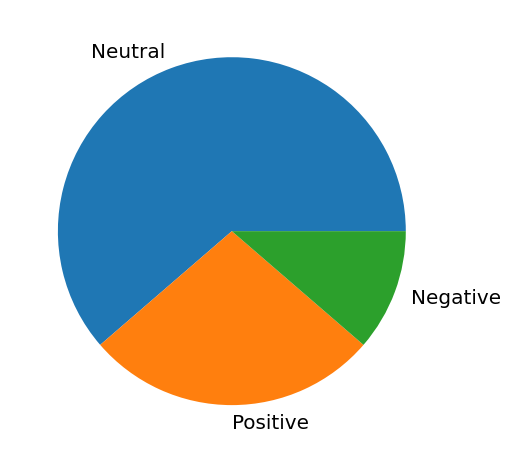

In [89]:
myValues = np.array([1082, 482, 200])
myLabels = ["Neutral", "Positive", "Negative"]

plt.pie(myValues, labels= myLabels)
plt.show()

In [90]:
data['Clean_text'].head()

0    scott hasn watch fast furiou movi final last w...
1                                     save fast furiou
2          thi fast furiou even krishna reach like thi
3    maze runner fast furiou mission imposs avang s...
4                          fast furiou worst film time
Name: Clean_text, dtype: object

In [91]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Considering 3 grams and mimnimum frq as 0
tf_idf_vect = CountVectorizer(analyzer='word',ngram_range=(1,1),stop_words='english', min_df = 0.0001)
tf_idf_vect.fit(data['Clean_text'])
desc_matrix = tf_idf_vect.transform(data["Clean_text"])

In [95]:
# implement kmeans
from sklearn.cluster import KMeans
num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state=7)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

In [96]:
# create DataFrame films from all of the input files.
tweets = {'Tweet': data["Clean_text"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame

,Tweet,Cluster
2,scott hasn watch fast furiou movi final last w...,2
2,save fast furiou,2
2,thi fast furiou even krishna reach like thi,2
0,maze runner fast furiou mission imposs avang s...,0
2,fast furiou worst film time,2
...,...,...
0,fast furiou thi movi just your usual action mo...,0
2,haven seen fast furiou movi kodwa taxi ngathi ...,2
2,fast furiou releas date,2
2,watch fast furiou pray mental health gonna wit...,2


In [97]:
frame['Cluster'].value_counts()

1    787
2    708
0    271
Name: Cluster, dtype: int64

In [98]:
frame[frame['Cluster'] == 1]

,Tweet,Cluster
1,raccoon pooh drama pedal tuition wisconsin lov...,1
1,raccoon pooh drama pedal tuition wisconsin lov...,1
1,raccoon pooh drama pedal tuition wisconsin lov...,1
1,raccoon pooh drama pedal tuition wisconsin lov...,1
1,raccoon pooh drama pedal tuition wisconsin lov...,1
...,...,...
1,raccoon pooh drama pedal tuition wisconsin lov...,1
1,raccoon pooh drama pedal tuition wisconsin lov...,1
1,raccoon pooh drama pedal tuition wisconsin lov...,1
1,raccoon pooh drama pedal tuition wisconsin lov...,1


In [99]:
frame[frame['Cluster'] == 2]

,Tweet,Cluster
2,scott hasn watch fast furiou movi final last w...,2
2,save fast furiou,2
2,thi fast furiou even krishna reach like thi,2
2,fast furiou worst film time,2
2,tell fast furiou most ridicul mean ridicul mov...,2
...,...,...
2,homework then quickli wast hour fast furiou,2
2,haven seen fast furiou movi kodwa taxi ngathi ...,2
2,fast furiou releas date,2
2,watch fast furiou pray mental health gonna wit...,2


In [100]:
frame[frame['Cluster'] == 0]

,Tweet,Cluster
0,maze runner fast furiou mission imposs avang s...,0
0,readi tonight fast furiou sofa readi tabl read...,0
0,what about fast furiou worst they took unreali...,0
0,thi when realiz fast furiou indian movi could ...,0
0,forget about what happen fast furiou talk abou...,0
...,...,...
0,thi when realiz fast furiou indian movi could ...,0
0,debrief about fast furiou funniest best part w...,0
0,fast furiou brand level imagin http cqzsf cydb,0
0,just watch fast furiou holi shit laugh crazi e...,0


In [101]:
frame

,Tweet,Cluster
2,scott hasn watch fast furiou movi final last w...,2
2,save fast furiou,2
2,thi fast furiou even krishna reach like thi,2
0,maze runner fast furiou mission imposs avang s...,0
2,fast furiou worst film time,2
...,...,...
0,fast furiou thi movi just your usual action mo...,0
2,haven seen fast furiou movi kodwa taxi ngathi ...,2
2,fast furiou releas date,2
2,watch fast furiou pray mental health gonna wit...,2
